In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/Electric_Production.csv"  # Update with the correct path
df = pd.read_csv(file_path)

In [2]:
# Convert DATE to datetime format
df["DATE"] = pd.to_datetime(df["DATE"], format="%d-%m-%Y")
df.set_index("DATE", inplace=True)

In [3]:
# Extract Year and Month for seasonal analysis
df["Year"] = df.index.year
df["Month"] = df.index.month

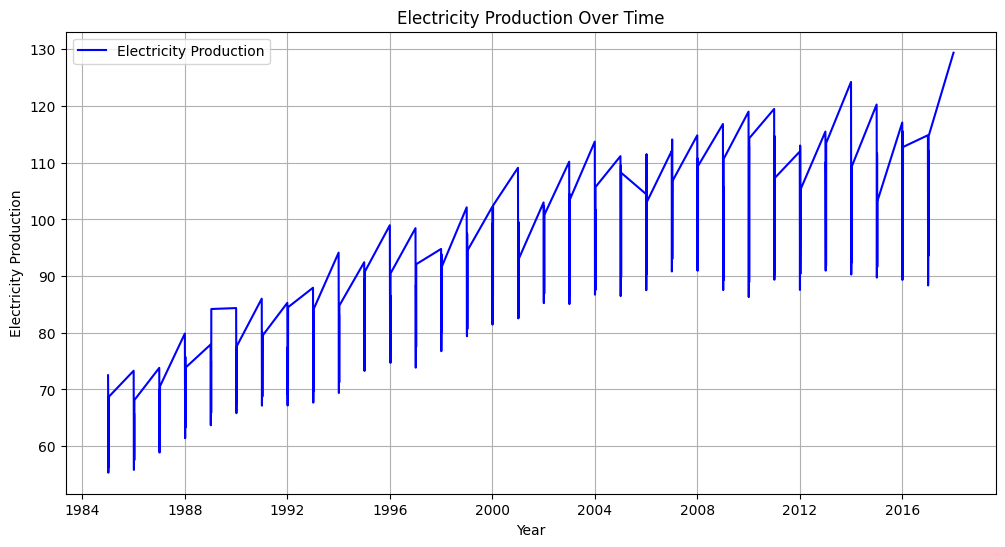

In [5]:
# Plot the electricity production trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Value"], label="Electricity Production", color="blue")
plt.xlabel("Year")
plt.ylabel("Electricity Production")
plt.title("Electricity Production Over Time")
plt.legend()
plt.grid(True)
plt.show()

# 1️⃣ Seasonality Analysis – Identify Yearly/Monthly Patterns

<ipython-input-6-bc799acd45bd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Month", y="Value", data=df, palette="coolwarm")


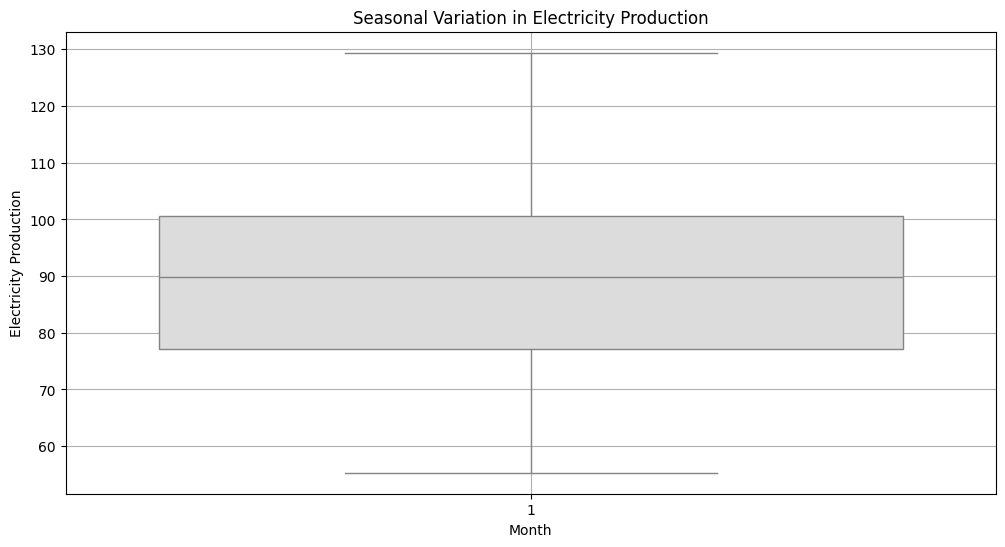

In [6]:
# Extract Year and Month for seasonal analysis
df["Year"] = df.index.year
df["Month"] = df.index.month

# Plot monthly electricity production trends
plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="Value", data=df, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Electricity Production")
plt.title("Seasonal Variation in Electricity Production")
plt.grid(True)
plt.show()

# 2️⃣ Decomposition – Trend, Seasonality & Residuals

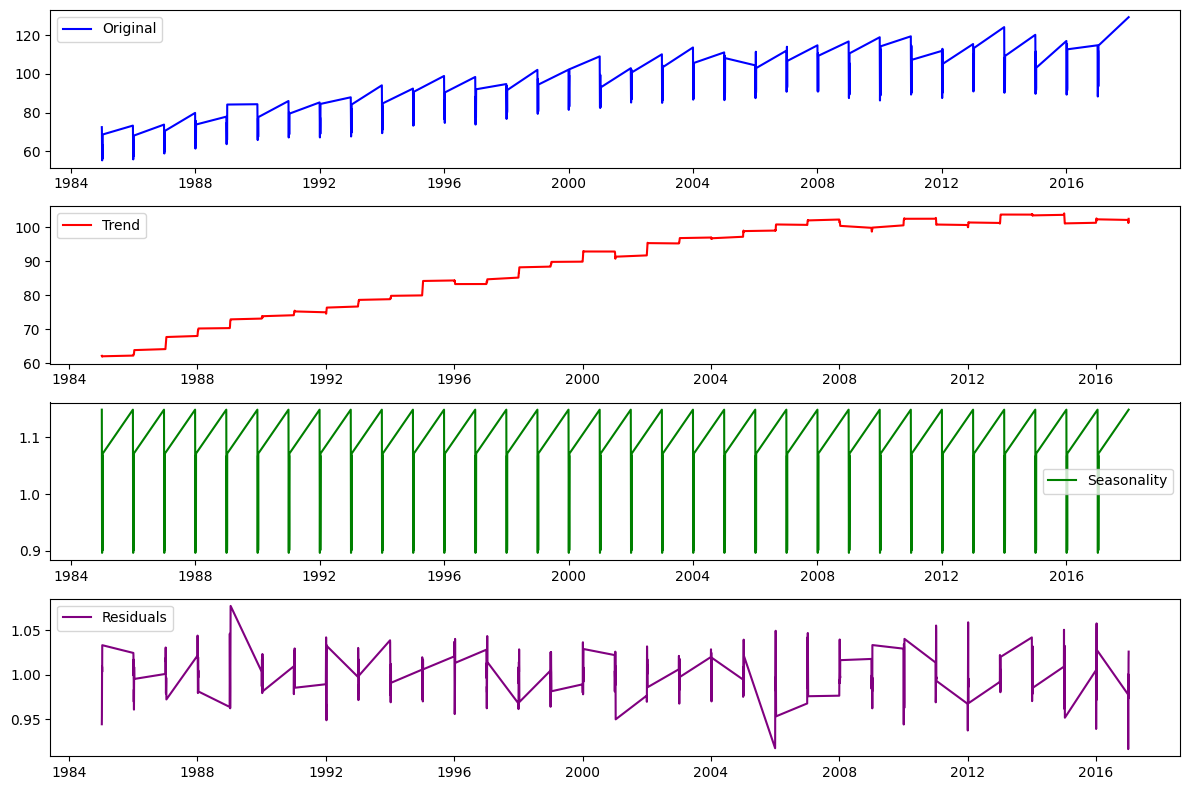

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition (Multiplicative model)
decomposed = seasonal_decompose(df["Value"], model="multiplicative", period=12)

# Plot decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df["Value"], label="Original", color="blue")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(decomposed.trend, label="Trend", color="red")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(decomposed.seasonal, label="Seasonality", color="green")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(decomposed.resid, label="Residuals", color="purple")
plt.legend(loc="best")

plt.tight_layout()
plt.show()


# 3️⃣ Forecasting Model – ARIMA for Electricity Prediction

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Mean Absolute Error: 5.68


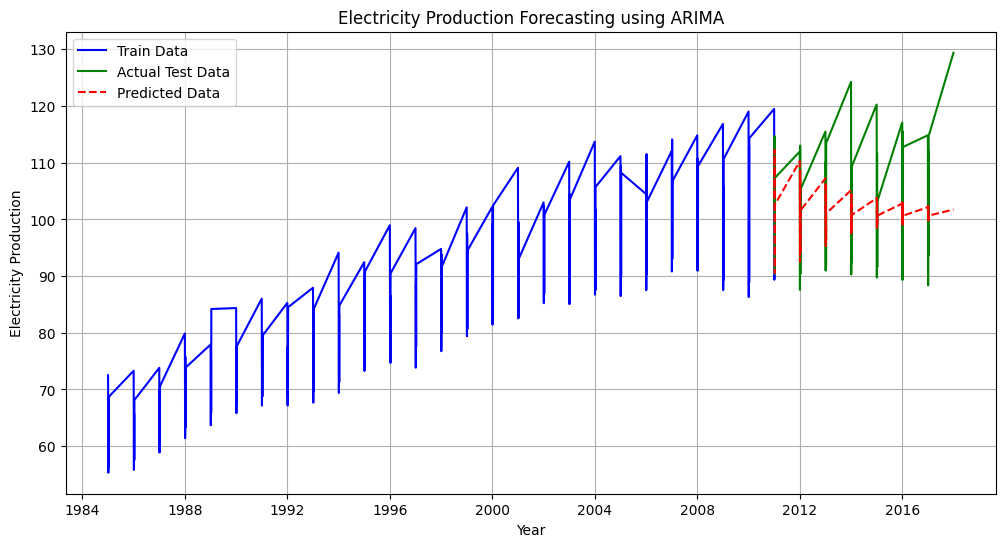

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df["Value"][:train_size], df["Value"][train_size:]

# Fit ARIMA model (AutoRegressive Integrated Moving Average)
model = ARIMA(train, order=(5,1,0))  # (p,d,q) parameters can be tuned
fitted_model = model.fit()

# Forecast for test set
forecast = fitted_model.forecast(steps=len(test))

# Evaluate performance
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error: {mae:.2f}")

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(train, label="Train Data", color="blue")
plt.plot(test, label="Actual Test Data", color="green")
plt.plot(test.index, forecast, label="Predicted Data", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Electricity Production")
plt.title("Electricity Production Forecasting using ARIMA")
plt.legend()
plt.grid(True)
plt.show()


# Anomaly Detection in Electricity Production (Find Unexpected Spikes or Drops)

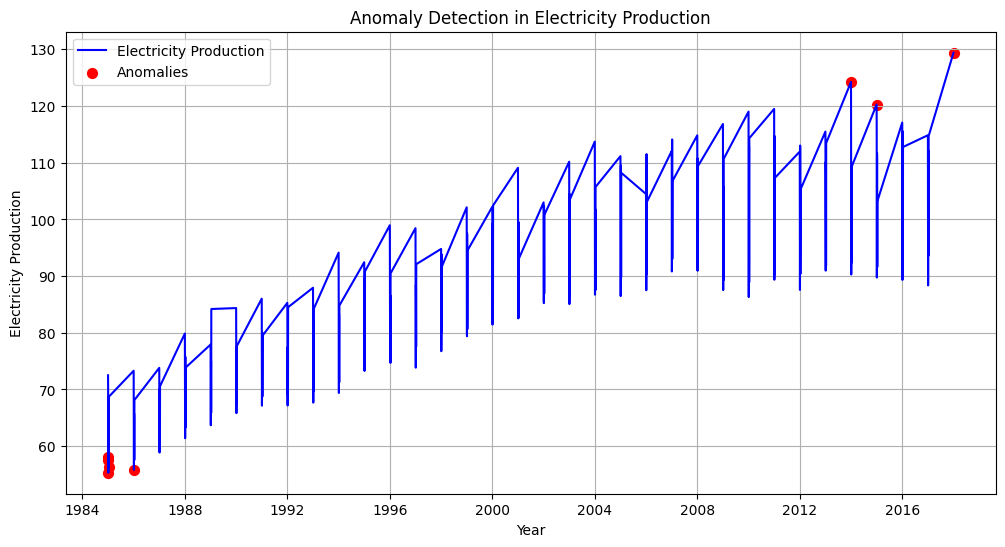

In [9]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Prepare the dataset
df["Timestamp"] = df.index.astype(np.int64) // 10**9  # Convert datetime to numerical format
X = df[["Timestamp", "Value"]]

# Fit Isolation Forest
model = IsolationForest(contamination=0.02, random_state=42)
df["Anomaly"] = model.fit_predict(X)

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Value"], label="Electricity Production", color="blue")

# Mark anomalies in red
anomalies = df[df["Anomaly"] == -1]
plt.scatter(anomalies.index, anomalies["Value"], color="red", label="Anomalies", s=50)

plt.xlabel("Year")
plt.ylabel("Electricity Production")
plt.title("Anomaly Detection in Electricity Production")
plt.legend()
plt.grid(True)
plt.show()


🔹 Total Data Points: 395
🔴 Total Anomalies Detected: 8
⚠️ Anomaly Percentage: 2.03%


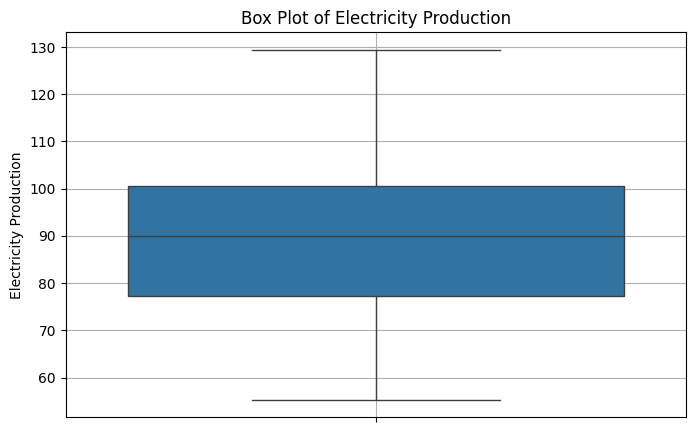

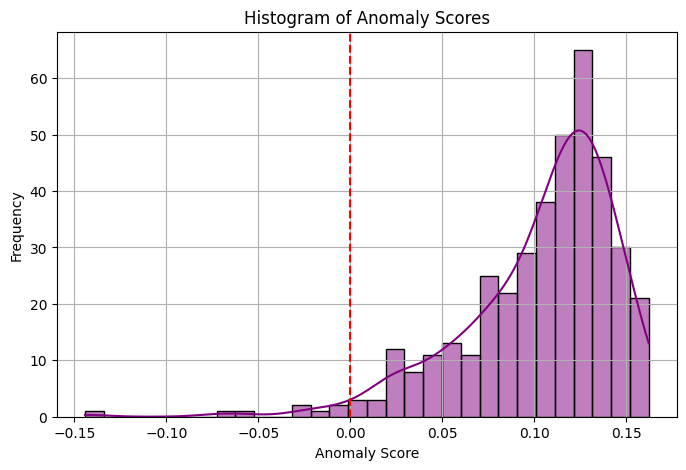

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest # import IsolationForest
import numpy as np

# ✅ 1. **Anomaly Count & Percentage**
total_anomalies = (df["Anomaly"] == -1).sum()
total_points = len(df)
anomaly_percentage = (total_anomalies / total_points) * 100

print(f"🔹 Total Data Points: {total_points}")
print(f"🔴 Total Anomalies Detected: {total_anomalies}")
print(f"⚠️ Anomaly Percentage: {anomaly_percentage:.2f}%")

# ✅ 2. **Box Plot of Electricity Production (to see anomaly outliers)**
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Value"])
plt.title("Box Plot of Electricity Production")
plt.ylabel("Electricity Production")
plt.grid(True)
plt.show()

# ✅ 3. **Histogram of Anomaly Scores**
plt.figure(figsize=(8, 5))
# Prepare the dataset and Fit Isolation Forest, if it hasn't already been done
# This is the same code from your Isolation Forest section
df["Timestamp"] = df.index.astype(np.int64) // 10**9  # Convert datetime to numerical format
X_anomaly = df[["Timestamp", "Value"]] # Rename X to X_anomaly to avoid confusion

isolation_forest_model = IsolationForest(contamination=0.02, random_state=42) # Create IsolationForest object
df["Anomaly"] = isolation_forest_model.fit_predict(X_anomaly) # Fit to the data

# Now you can use isolation_forest_model.decision_function
sns.histplot(isolation_forest_model.decision_function(X_anomaly), bins=30, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="dashed")  # Threshold for anomaly detection
plt.title("Histogram of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Forecasting Electricity Demand using XGBoost ⚡

Mean Absolute Error: 4.36


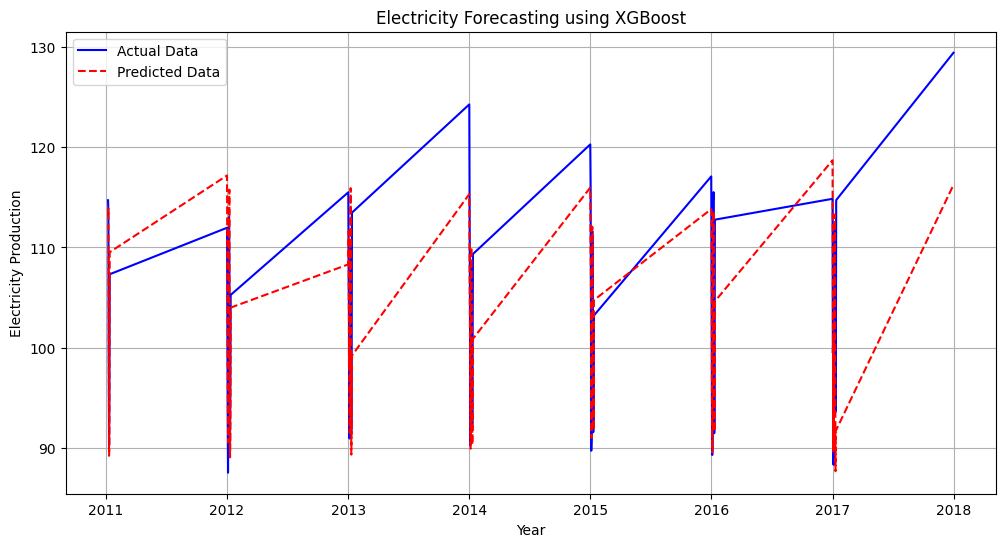

In [10]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Create features (lag-based time series transformation)
df["Lag_1"] = df["Value"].shift(1)  # Previous day's production
df["Lag_2"] = df["Value"].shift(2)  # Two days ago
df["Month"] = df.index.month
df["Year"] = df.index.year
df.dropna(inplace=True)  # Drop missing values

# Split dataset into features and target variable
X = df[["Lag_1", "Lag_2", "Month", "Year"]]
y = df["Value"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, objective="reg:squarederror", random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Data", color="blue")
plt.plot(y_test.index, predictions, label="Predicted Data", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Electricity Production")
plt.title("Electricity Forecasting using XGBoost")
plt.legend()
plt.grid(True)
plt.show()


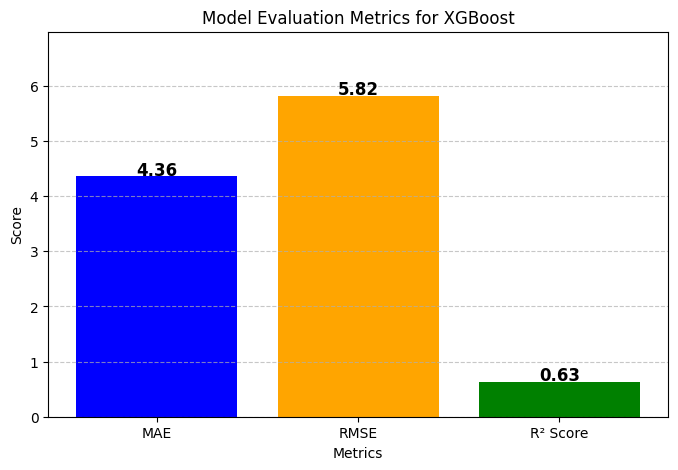

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Calculate additional metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

# Create a dataframe for visualization
metrics = {
    "Metric": ["MAE", "RMSE", "R² Score"],
    "Value": [mae, rmse, r2]
}

# Convert to DataFrame for plotting
metrics_df = pd.DataFrame(metrics)

# ✅ Bar Plot for Metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics_df["Metric"], metrics_df["Value"], color=["blue", "orange", "green"])
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics for XGBoost")
plt.ylim(0, max(metrics_df["Value"]) * 1.2)  # Set y-limit for better visibility

# Display values on top of bars
for i, v in enumerate(metrics_df["Value"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [18]:
import pickle
import os

# Ensure the directory exists
os.makedirs("models", exist_ok=True)

# Save the trained model to a file
with open("models/trained_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("✅ Model saved successfully as 'models/trained_model.pkl'")


✅ Model saved successfully as 'models/trained_model.pkl'


In [19]:
# Load the trained model
with open("models/trained_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

# Make predictions
predictions = loaded_model.predict(X_test)

print("✅ Model loaded successfully and predictions made!")


✅ Model loaded successfully and predictions made!


In [20]:
!pip install flask-ngrok

from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import pickle
import pandas as pd

# Load the trained model
with open("/content/models/trained_model.pkl", "rb") as file:
    model = pickle.load(file)

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def home():
    return "Electricity Forecasting Model is Running!"

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    input_data = pd.DataFrame([data])  # Convert input to DataFrame
    prediction = model.predict(input_data)
    return jsonify({"prediction": prediction.tolist()})

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           

In [21]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [22]:
import streamlit as st
import pickle
import pandas as pd

# Load the trained model
with open("/content/models/trained_model.pkl", "rb") as file:
    model = pickle.load(file)

# Streamlit UI
st.title("Electricity Forecasting Model ⚡")
st.write("Enter values to predict future electricity production.")

# Input fields
lag_1 = st.number_input("Previous day's production", value=1000.0)
lag_2 = st.number_input("Two days ago production", value=950.0)
month = st.number_input("Month (1-12)", value=6)
year = st.number_input("Year", value=2024)

# Prediction
if st.button("Predict"):
    input_data = pd.DataFrame([[lag_1, lag_2, month, year]], columns=["Lag_1", "Lag_2", "Month", "Year"])
    prediction = model.predict(input_data)[0]
    st.success(f"Predicted Electricity Production: {prediction:.2f} MW")


2025-04-02 20:37:32.273 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 20:37:32.516 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-02 20:37:32.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 20:37:32.530 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 20:37:32.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 20:37:32.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 20:37:32.538 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 20:37:32.545 Thread 'MainThread': mi

In [23]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.9 MB/s eta 0:00:00


In [25]:
import gradio as gr
import pickle
import pandas as pd

# Load trained model
with open("/content/models/trained_model.pkl", "rb") as file:
    model = pickle.load(file)

# Define prediction function
def predict_electricity(lag_1, lag_2, month, year):
    input_data = pd.DataFrame([[lag_1, lag_2, month, year]], columns=["Lag_1", "Lag_2", "Month", "Year"])
    prediction = model.predict(input_data)[0]
    return f"Predicted Electricity Production: {prediction:.2f} MW"

# Create Gradio UI
iface = gr.Interface(
    fn=predict_electricity,
    inputs=[
        gr.Number(label="Previous day's production"),
        gr.Number(label="Two days ago production"),
        gr.Number(label="Month (1-12)"),
        gr.Number(label="Year")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="⚡ Electricity Forecasting Model",
    description="Enter the past electricity production data and get the predicted value.",
)

# Launch the app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1c3e46685854fa62fb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
